In [1]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.1+cu118 -f https://download.pytorch.org/whl/cu118/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu118/torch_stable.html

ERROR: Cannot install torch==2.0.1+cu118, torchaudio==2.0.1+cu118 and torchvision==0.15.2+cu118 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts



  Using cached https://download.pytorch.org/whl/cu118/torch-2.0.1%2Bcu118-cp311-cp311-win_amd64.whl (2619.2 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.15.2%2Bcu118-cp311-cp311-win_amd64.whl (4.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.0.1%2Bcu118-cp311-cp311-win_amd64.whl (2.5 MB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    The user requested torch==2.0.1+cu118
    torchvision 0.15.2+cu118 depends on torch==2.0.1
    torchaudio 2.0.1+cu118 depends on torch==2.0.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



In [2]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

c:\Users\arees\OneDrive\Desktop\cv_theory_project\yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.
C:\Users\arees\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
!pip install -r requirements.txt

In [4]:
!pip install opencv-python

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') #downloads the smaller version of yolov5

Using cache found in C:\Users\arees/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-11 Python-3.11.9 torch-2.0.0+cu118 CPU

100%|██████████| 14.1M/14.1M [02:47<00:00, 88.3kB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

MAKE DETECTIONS

In [3]:
img = 'C:/Users/arees/OneDrive/Desktop/cv_theory_project/56f455011e0000b300705475.jpeg'
results = model(img)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 534x949 5 persons, 5 pizzas, 1 donut
Speed: 158.1ms pre-process, 326.5ms inference, 25.6ms NMS per image at shape (1, 3, 384, 640)

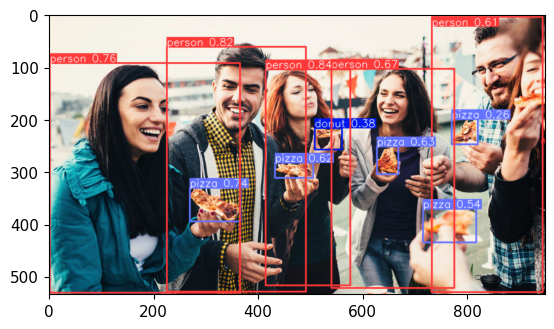

In [4]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[248, 242, 230],
         [248, 242, 230],
         [248, 242, 230],
         ...,
         [ 50,  36,  35],
         [ 47,  33,  32],
         [ 47,  33,  33]],
 
        [[248, 242, 230],
         [248, 242, 230],
         [248, 242, 230],
         ...,
         [ 47,  36,  34],
         [ 45,  34,  32],
         [ 44,  32,  32]],
 
        [[248, 242, 230],
         [248, 242, 230],
         [248, 242, 230],
         ...,
         [ 46,  35,  33],
         [ 44,  33,  31],
         [ 44,  32,  32]],
 
        ...,
 
        [[255,  56,  56],
         [255,  56,  56],
         [255,  56,  56],
         ...,
         [ 16,  12,  15],
         [  0,   2,   5],
         [ 14,  17,  22]],
 
        [[230,  99,  93],
         [255,  56,  56],
         [255,  56,  56],
         ...,
         [  3,   7,  10],
         [  3,   7,  10],
         [  7,  10,  15]],
 
        [[178, 189, 170],
         [193, 165, 150],
         [208, 135, 124],
         ...,
         [  3,   7,  10],
  

REAL TIME DETECCTION

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TRAIN FROM SCRATCH

In [11]:
import uuid    #to create a unique identifier, going to be used to name images
import os
import time    #to take break between taking images

In [12]:
IMAGES_PATH = os.path.join(r'C:\Users\arees\OneDrive\Desktop\cv_theory_project\data', r'C:\Users\arees\OneDrive\Desktop\cv_theory_project\data\images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [68]:
cap = cv2.VideoCapture(0)
# loop through labels
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)

#loop through images
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        ret, frame = cap.read()
                
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#just for seeing outputs
'''
for label in labels:
    print("Collecting images for {}".format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)
'''

In [13]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
error: 6005 bytes of body are still expected
fetch-pack: unexpected disconnect while reading sideband packet
fatal: early EOF
fatal: fetch-pack: invalid index-pack output


In [14]:
!pip install pyqt5 lxml --upgrade

In [15]:
!pip3 install labelImg

In [16]:
%cd C:\Users\arees\OneDrive\Desktop\cv_theory_project\labelImg-master

C:\Users\arees\OneDrive\Desktop\cv_theory_project\labelImg-master


In [17]:
!pyrcc5 -o libs/resources.py resources.qrc

In [18]:
%cd C:\Users\arees\OneDrive\Desktop\cv_theory_project\yolov5

C:\Users\arees\OneDrive\Desktop\cv_theory_project\yolov5


In [94]:
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-315-g32b91615 Python-3.11.9 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, 

LOADING MODEL

In [19]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'C:\Users\arees\OneDrive\Desktop\cv_theory_project\yolov5\runs\train\exp\weights\last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\arees/.cache\torch\hub\master.zip
YOLOv5  2024-6-11 Python-3.11.9 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [20]:
img = os.path.join('data', 'images', r'C:\Users\arees\OneDrive\Desktop\cv_theory_project\data\images\awake.52078a70-1d1e-11ef-a72b-845cf325836a.jpg')
results = model(img)
results.print()

image 1/1: 480x640 1 awake
Speed: 24.9ms pre-process, 262.8ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


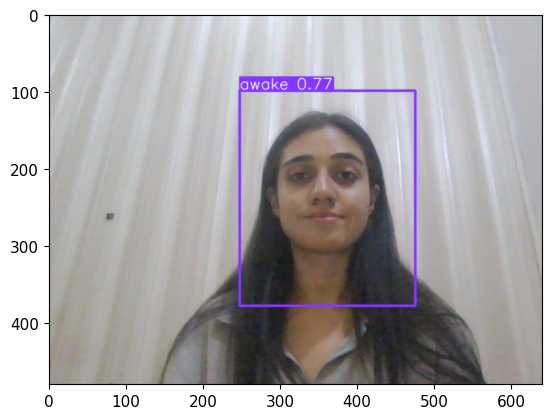

In [21]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections q
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

EVALUATION 

In [118]:
!python train.py --img 640 --batch 16 --epochs 50 --data dataset.yml --weights yolov5s.pt --project cv_theory_project --name yolov5_results

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=cv_theory_project, name=yolov5_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-315-g32b91615 Python-3.11.9 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, war

In [22]:
import pandas as pd

# Loading the CSV file
results_path = r'C:\Users\arees\OneDrive\Desktop\cv_theory_project\yolov5\cv_theory_project\yolov5_results\results.csv'
results_df = pd.read_csv(results_path)

print(results_df.columns)

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')


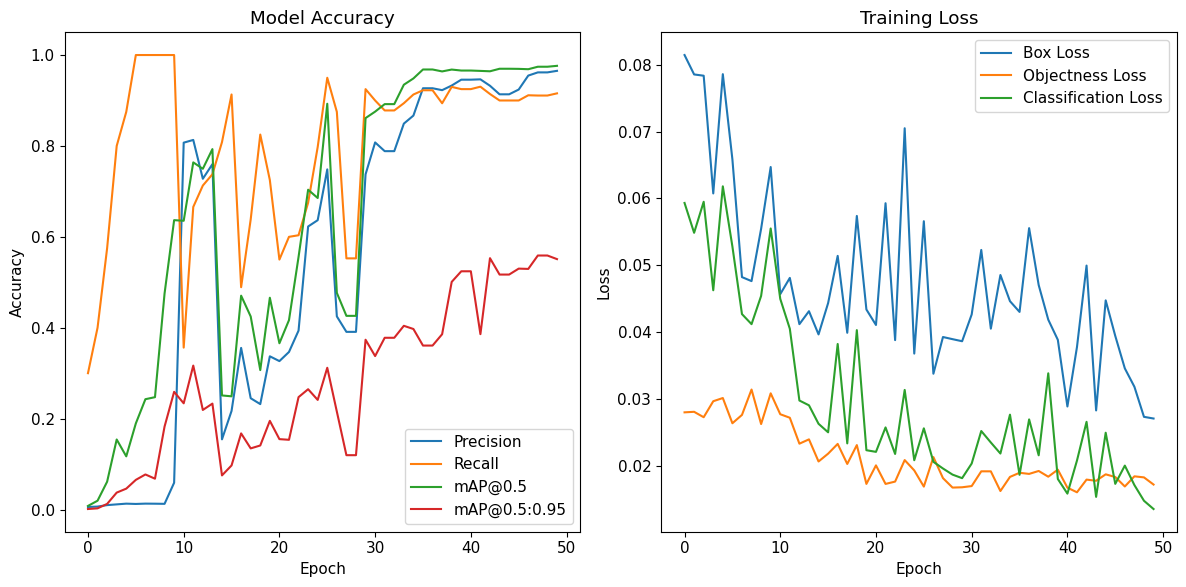

In [24]:
results_df.columns = results_df.columns.str.strip()

# Plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy
ax[0].plot(results_df['epoch'], results_df['metrics/precision'], label='Precision')
ax[0].plot(results_df['epoch'], results_df['metrics/recall'], label='Recall')
ax[0].plot(results_df['epoch'], results_df['metrics/mAP_0.5'], label='mAP@0.5')
ax[0].plot(results_df['epoch'], results_df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].legend()

# Plot loss
ax[1].plot(results_df['epoch'], results_df['train/box_loss'], label='Box Loss')
ax[1].plot(results_df['epoch'], results_df['train/obj_loss'], label='Objectness Loss')
ax[1].plot(results_df['epoch'], results_df['train/cls_loss'], label='Classification Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Training Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

FINE TUNING

In [30]:
import subprocess

# Define training parameters and configurations
img_size = 320
batch_size = 16
epochs = 500
data_path = 'dataset.yml'
weights_path = 'yolov5s.pt'
hyp_path = 'data/hyps/hyp.scratch-low.yaml'
workers = 2
optimizer = 'Adam'
cos_lr = True
label_smoothing = 0.1
freeze_layers = 10
patience = 50
project_dir = 'runs/train_drowsy'
experiment_name = 'exp_drowsy'
exist_ok = True

# Create the command list
train_command = [
    'python', 'train.py',
    '--img', str(img_size),
    '--batch', str(batch_size),
    '--epochs', str(epochs),
    '--data', data_path,
    '--weights', weights_path,
    '--hyp', hyp_path,
    '--workers', str(workers),
    '--optimizer', optimizer,
    '--cos-lr' if cos_lr else '',
    '--label-smoothing', str(label_smoothing),
    '--freeze', str(freeze_layers),
    '--patience', str(patience),
    '--project', project_dir,
    '--name', experiment_name,
    '--exist-ok' if exist_ok else ''
]

# Remove empty strings from the command list
train_command = [arg for arg in train_command if arg]

# Execute the command and capture the output
result = subprocess.run(train_command, capture_output=True, text=True)

# Print the captured output
print(result.stdout)
print(result.stderr)


github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=2, project=runs/train_drowsy, name=exp_drowsy, exist_ok=True, quad=False, cos_lr=True, label_smoothing=0.1, patience=50, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  v7.0-315-g32b91615 Python-3.11.9 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls